# Using Python to Numerically Solve First-Order IVPs
> Initial version created by K. Oliveras on 14 January 2020

This Python Notebook demonstrates how to numerically solve the initial value problem $$y' = y\left(1 - y\right), \qquad y(0) = 0.5$$ using an explicit Runge-Kutta method of order 5(4) (Dormand,Prince).

The following block of code loads the appropriate libraries needed to 
 1. use *Matlab-like* arrays `numpy`
 2. use `scipy`'s Runge-Kutta solver
 3. use `matplotlib` to create plots

In [90]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family='Sans Serif')
plt.rc('text', usetex=True)


The first step is that we will need write the differential equation in the general form $$y' = f(t,y)$$ and define the function `f(t,y)`.  It is worth noting that the differential equation is already in this standard form where $$f(t,y) = y (1-y).$$  

The following block of code defines the function `ODEFun` that takes the input `t` (our independent variable) and `y` (our dependent variable.

In [96]:
def ODEFun(t,y):
    return y*(1-y)

Now that we have defined our differential equation, we can set the range of $t$ values we want to solve over, as well as our initial condition.  

In [97]:
tSpan = [0,10]
iniCond = [0.5]
t = np.linspace(0,10,100);

Now that we have defined the variables, we can use `SciPy`'s `solve_ivp` command to numerically solve the ODE.  The following block of code calls `solve_ivp` and plots the solution (along with labeling the axes and putting a title on figure).  

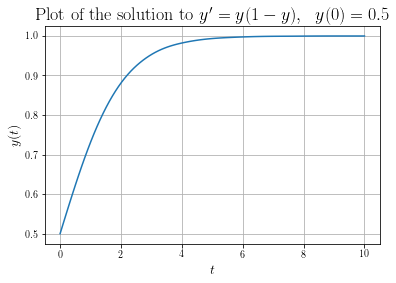

In [98]:
sol = solve_ivp(ODEFun, tSpan, iniCond, t_eval = t);
plt.plot(sol.t,sol.y[0,:]);
    
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$y(t)$',fontsize=14);
plt.title('Plot of the solution to $y^\prime = y(1-y), ~~y(0) = 0.5$',fontsize=18);
plt.grid();
plt.show()

## Plotting solutions with multiple initial conditions

Now, let's see how the solutions changes as we vary the initial conditions.  Let's create a vector of initial conditions so that $$y(0) = 0, 0.1, 0.2, \ldots 1.2$$  The command `np.linspace(a,b,n)` creates $n$ equally spaced points starting at $a$ and ending at $b$.  The following command will generate the list of initial values we are interested in exploring.

In [94]:
a = np.linspace(0,1.2,13)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]


Now, we will simply loop over these initial conditions and plot the solution as before

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


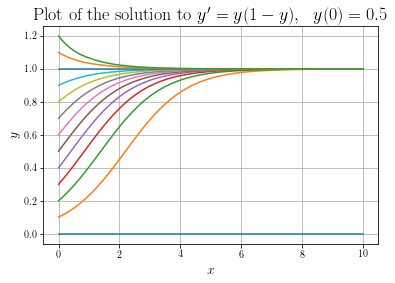

In [95]:
for j in range(0,np.size(a)):
    sol = solve_ivp(ode_fun, tSpan, [a[j]], t_eval = t);
    plt.plot(sol.t,sol.y[0,:]);
    
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14);
plt.title('Plot of the solution to $y^\prime = y(1-y), ~~y(0) = 0.5$',fontsize=18);
plt.grid();
plt.show()